In [22]:
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import gc
import sys
sys.path.append('../../GLS/python/')

import lightkurve as lk
from astropy.timeseries import LombScargle
import astropy.units as u

from gls import Gls
from tqdm.notebook import tqdm

In [85]:
target_list = [
    "TOI540",
    "TOI837",
    "TOI942",
    "TOI251",
    "TOI451",
    "TOI1685",
    "TOI776"
]

P_rot_list = [
    "0.72610",
    "3.004",
    "3.39",
    "3.84",
    "5.1",
    "18.66",
    "34.4"
]

P_rot_var_list = [
    "0.00039",
    "0.053",
    "0.01",
    "0.48",
    "0.1",
    "0.71",
    "2.0"
]
df_preds = pd.DataFrame()
df_preds["target"] = pd.Series(target_list)
df_preds["P_rot"] = pd.Series(P_rot_list)
df_preds["P_rot_var"] = pd.Series(P_rot_var_list)
df_preds["P_rot_pred"] = None
df_preds["P_rot_var_pred"] = None

In [86]:
df_preds

,target,P_rot,P_rot_var,P_rot_pred,P_rot_var_pred
0,TOI540,0.72610,0.00039,None,None
1,TOI837,3.004,0.053,None,None
2,TOI942,3.39,0.01,None,None
3,TOI251,3.84,0.48,None,None
4,TOI451,5.1,0.1,None,None
5,TOI1685,18.66,0.71,None,None
6,TOI776,34.4,2.0,None,None


In [87]:
if __name__ == "__main__":
    P_rot_pred = []
    P_rot_var_pred = []
    for idx, target_star in enumerate(tqdm(target_list)):
        try:
            lc_file = lk.search_lightcurve(f"{target_star}")
            lc = lc_file[lc_file.author.data=="SPOC"][0].download()
            lc = lc.normalize().remove_nans()
            
            gc.collect()

            #calculate the P_rot by GLM
            df = [lc.time.value, lc.flux.value, lc.flux_err.value]
            gls = Gls(df, Pbeg=0.1, Pend=6)
            preds = gls.best
            print(preds)

            #store the predicted values
            P_rot_pred.append(preds["P"])
            P_rot_var_pred.append(preds["e_P"])
        
        except:
            print(f"Cannnot get LightCurve of {target_star}, Try again")
            P_rot_pred.append(None)
            P_rot_var_pred.append(None)
            continue
        #download the first SPOC data


        
df_preds["P_rot_pred"] = P_rot_pred
df_preds["P_rot_var_pred"] = P_rot_var_pred     
        
df_preds
        

{'f': 1.376933128583133, 'P': 0.7262516815388138, 'amp': 0.001745715781168953, 'ph': -0.16321848706128647, 'T0': 1411.0227572666201, 'offset': 0.9999762286998071, 'e_amp': 3.120244077741413e-05, 'e_ph': 0.0028446914095788664, 'e_T0': 0.0020659619196656703, 'e_offset': 2.2063457463281183e-05, 'e_f': 0.0004966399876709964, 'e_P': 0.0002619485425095576}
{'f': 0.3360681696353417, 'P': 2.9755867718298714, 'amp': 0.0063887912278260935, 'ph': 0.2904298732453025, 'T0': 1568.8449429987481, 'offset': 1.000809147230829, 'e_amp': 4.0068056619175606e-05, 'e_ph': 0.0009981589699242118, 'e_T0': 0.002970108627089815, 'e_offset': 2.8332394544385605e-05, 'e_f': 0.00018258087708149777, 'e_P': 0.0016165923813085431}
{'f': 0.29442232937289803, 'P': 3.3964815173154164, 'amp': 0.01144295130646992, 'ph': -0.46969474321668664, 'T0': 2175.8280890360606, 'offset': 0.9994578179335369, 'e_amp': 5.0557017728538754e-05, 'e_ph': 0.000703175174304206, 'e_T0': 0.002388321482959282, 'e_offset': 3.5749210072418255e-05, '

,target,P_rot,P_rot_var,P_rot_pred,P_rot_var_pred
0,TOI540,0.72610,0.00039,0.726252,0.000262
1,TOI837,3.004,0.053,2.975587,0.001617
2,TOI942,3.39,0.01,3.396482,0.001504
3,TOI251,3.84,0.48,3.823522,0.001525
4,TOI451,5.1,0.1,2.620050,0.001874
5,TOI1685,18.66,0.71,0.668769,0.002135
6,TOI776,34.4,2.0,6.000000,NaN


In [4]:
resuluts

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,200322593,0.0
1,TESS Sector 04,2018,TESS-SPOC,1800,200322593,0.0
2,TESS Sector 04,2018,QLP,1800,200322593,0.0
3,TESS Sector 05,2018,SPOC,120,200322593,0.0
4,TESS Sector 05,2018,TESS-SPOC,1800,200322593,0.0
5,TESS Sector 05,2018,QLP,1800,200322593,0.0
6,TESS Sector 06,2018,SPOC,120,200322593,0.0
7,TESS Sector 06,2018,TESS-SPOC,1800,200322593,0.0
8,TESS Sector 06,2018,QLP,1800,200322593,0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

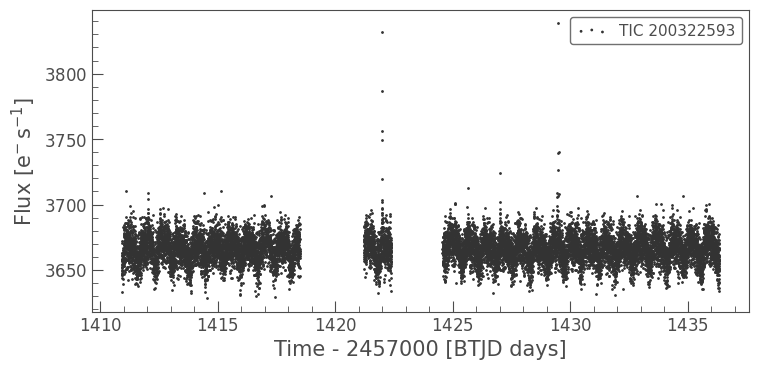

In [16]:
lc = resuluts[0].download()
lc.scatter()

In [17]:
df = [lc.time.value, lc.flux.value, lc.flux_err.value]
gls = Gls(df, Pbeg=0.1, Pend=10)
gls.best

No output of frequency error.
Increase frequency range to sample the peak maximum.


{'f': 0.1,
 'P': 10.0,
 'amp': nan,
 'ph': nan,
 'T0': nan,
 'offset': nan,
 'e_amp': nan,
 'e_ph': nan,
 'e_T0': nan,
 'e_offset': nan,
 'e_f': nan,
 'e_P': nan}

In [19]:
ans = gls.best

In [20]:
ans["P"]

10.0

../../GLS/python/gls.py:496: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('GLS periodogram')
../../GLS/python/gls.py:642: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


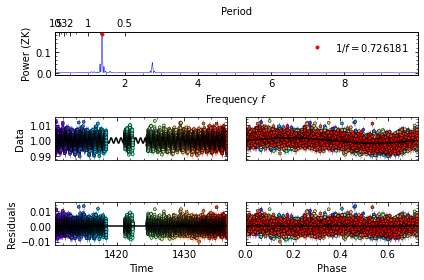

In [20]:
fig=gls.plot()

/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/lightkurve/lightcurve.py:1056: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning,


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

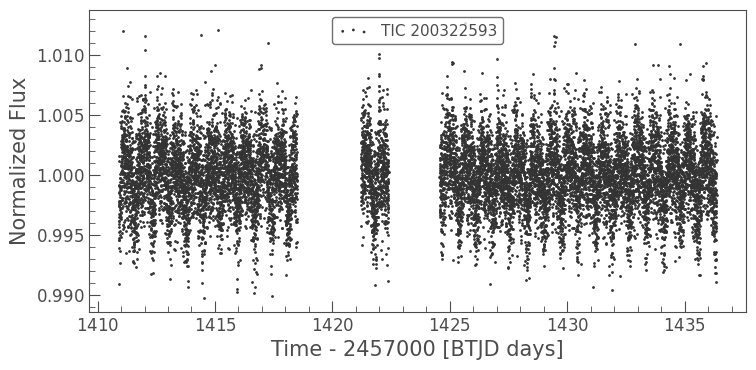

In [9]:
lc = lc.remove_nans().remove_outliers().normalize()
lc.scatter()

In [10]:
t = lc.time
y = lc.flux
frequency, power = LombScargle(t, y).autopower()

(0.0, 1.0)

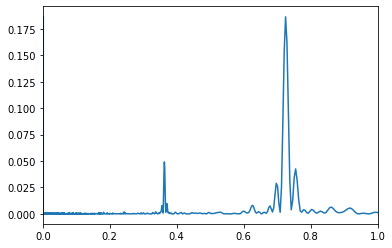

In [13]:
plt.plot(1/frequency, power)  
plt.xlim(0, 1)

In [12]:
period = (1/(frequency[np.argmax(power)]))
print(period)

0.0013862513647278905 d


In [15]:
df = [lc.time.value, lc.flux.value, lc.flux_err.value]
gls = Gls(df, Pbeg=0.1, Pend=10)

In [16]:
gls.best

{'f': 1.377066883515752,
 'P': 0.7261811404881999,
 'amp': 0.0017307190284542083,
 'ph': -0.1655938502852513,
 'T0': 1411.0244706969918,
 'offset': 0.9999615437020006,
 'e_amp': 3.0078204045581828e-05,
 'e_ph': 0.002765957255035548,
 'e_T0': 0.002008585994003325,
 'e_offset': 2.126850204654356e-05,
 'e_f': 0.0004809786220086618,
 'e_P': 0.0002536388090235397}

../../GLS/python/gls.py:496: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('GLS periodogram')
../../GLS/python/gls.py:642: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


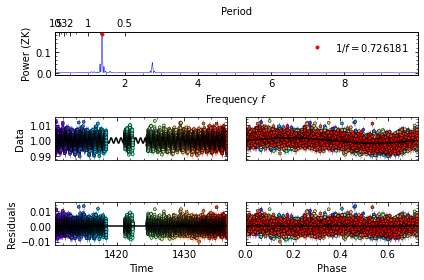

In [17]:
fig=gls.plot()

Results above may show that GLS can handle raw images properly(?)

(update) you have to remove outliers even if you use GLS


In [2]:
resuluts =lk.search_lightcurvefile("TOI540") #Prot=0.72610 ± 0.00039

/Users/masamasakobakoba/.pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  """Entry point for launching an IPython kernel.


In [5]:
resuluts

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,SPOC,120,200322593,0.0
1,TESS Sector 04,2018,TESS-SPOC,1800,200322593,0.0
2,TESS Sector 04,2018,QLP,1800,200322593,0.0
3,TESS Sector 05,2018,SPOC,120,200322593,0.0
4,TESS Sector 05,2018,TESS-SPOC,1800,200322593,0.0
5,TESS Sector 05,2018,QLP,1800,200322593,0.0
6,TESS Sector 06,2018,SPOC,120,200322593,0.0
7,TESS Sector 06,2018,TESS-SPOC,1800,200322593,0.0
8,TESS Sector 06,2018,QLP,1800,200322593,0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

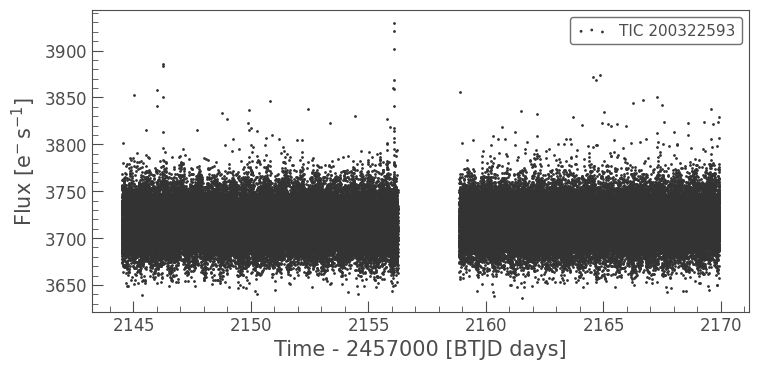

In [21]:
lc = resuluts[9].download()
lc.scatter()

In [22]:
df = [lc.time.value, lc.flux.value, lc.flux_err.value]
gls = Gls(df, Pbeg=0.1, Pend=10)
gls.best

No output of frequency error.
Increase frequency range to sample the peak maximum.


{'f': 0.1,
 'P': 10.0,
 'amp': nan,
 'ph': nan,
 'T0': nan,
 'offset': nan,
 'e_amp': nan,
 'e_ph': nan,
 'e_T0': nan,
 'e_offset': nan,
 'e_f': nan,
 'e_P': nan}

../../GLS/python/gls.py:496: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('GLS periodogram')


ValueError: arange: cannot compute length

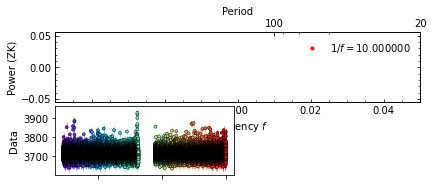

In [23]:
fig=gls.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

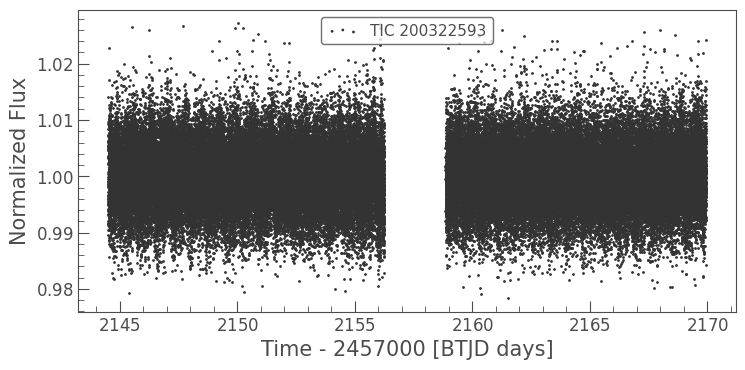

In [24]:
lc = lc.remove_nans().remove_outliers().normalize()
lc.scatter()

In [10]:
t = lc.time
y = lc.flux
frequency, power = LombScargle(t, y).autopower()

(0.0, 1.0)

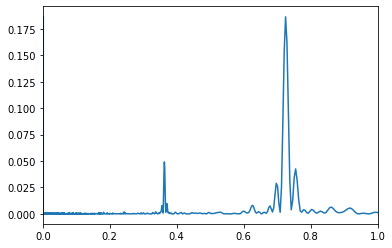

In [13]:
plt.plot(1/frequency, power)  
plt.xlim(0, 1)

In [12]:
period = (1/(frequency[np.argmax(power)]))
print(period)

0.0013862513647278905 d


In [25]:
df = [lc.time.value, lc.flux.value, lc.flux_err.value]
gls = Gls(df, Pbeg=0.1, Pend=10)

In [26]:
gls.best

{'f': 1.3779525837824453,
 'P': 0.725714376364842,
 'amp': 0.0010275931261454225,
 'ph': -0.20367811859378707,
 'T0': 2144.663690919997,
 'offset': 1.0000233400777627,
 'e_amp': 2.436425208648164e-05,
 'e_ph': 0.0037735666536093744,
 'e_T0': 0.0027385315706952907,
 'e_offset': 1.7228127868889656e-05,
 'e_f': 0.0006865279698272431,
 'e_P': 0.00036156775156412753}

../../GLS/python/gls.py:496: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('GLS periodogram')
../../GLS/python/gls.py:642: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


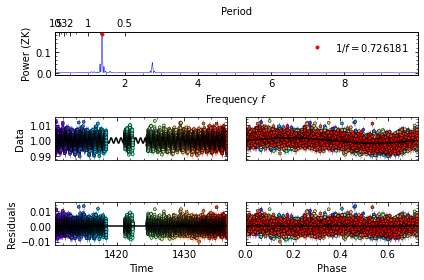

In [17]:
fig=gls.plot()

In [ ]:
resuluts =lk.search_lightcurvefile("TOI540") #Prot=0.72610 ± 0.00039

resuluts

lc = resuluts[0].download()
lc.scatter()

df = [lc.time.value, lc.flux.value, lc.flux_err.value]
gls = Gls(df, Pbeg=0.1, Pend=10)
gls.best

fig=gls.plot()

lc = lc.remove_nans().remove_outliers().normalize()
lc.scatter()

t = lc.time
y = lc.flux
frequency, power = LombScargle(t, y).autopower()

plt.plot(1/frequency, power)  
plt.xlim(0, 1)

period = (1/(frequency[np.argmax(power)]))
print(period)

df = [lc.time.value, lc.flux.value, lc.flux_err.value]
gls = Gls(df, Pbeg=0.1, Pend=10)

gls.best

fig=gls.plot()